In [1]:
#Final version of project workbook. 04.04.2024

In [137]:
#Load relevant libraries (not all used though)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn import linear_model, metrics, model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix, mean_absolute_error)
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#Specify path to raw data file
rawdatafilepath = "diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
print(rawdatafilepath)

diabetes_binary_5050split_health_indicators_BRFSS2015.csv


In [138]:
#Create dataframe from raw data file
df = pd.read_csv(rawdatafilepath)

In [139]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [140]:
#Check for missing values in the data
missing_values = df.isnull().sum()
missing_values
#So, there are no missing values

#Remove "Cholcheck" variables as it is pointless: almost always 1 (meaning respondent had a chol. check in last 5 years)
reduced_df = df.drop(columns="CholCheck")

# Display the first few rows of the reduced dataframe to verify the removal of "Cholcheck"
reduced_df.head()

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [142]:
#Define our finalised dataset
final_df = reduced_df

#Convert binary columns to boolean values (saves space)
binary_columns = ["Diabetes_binary", "HighBP", "HighChol", "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "DiffWalk", "Sex"]
for column in binary_columns:
    final_df[column] = df[column].astype("bool")
#final_df.head()
#final_df.describe()
#final_df.shape
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  bool   
 1   HighBP                70692 non-null  bool   
 2   HighChol              70692 non-null  bool   
 3   BMI                   70692 non-null  float64
 4   Smoker                70692 non-null  bool   
 5   Stroke                70692 non-null  bool   
 6   HeartDiseaseorAttack  70692 non-null  bool   
 7   PhysActivity          70692 non-null  bool   
 8   Fruits                70692 non-null  bool   
 9   Veggies               70692 non-null  bool   
 10  HvyAlcoholConsump     70692 non-null  bool   
 11  AnyHealthcare         70692 non-null  bool   
 12  NoDocbcCost           70692 non-null  bool   
 13  GenHlth               70692 non-null  float64
 14  MentHlth              70692 non-null  float64
 15  PhysHlth           

In [143]:
#Summarise the target variable ("Diabetes_binary") to show that the dataset is balanced
final_df["Diabetes_binary"].value_counts()

False    35346
True     35346
Name: Diabetes_binary, dtype: int64


Logistic Regression (single) prediction results: 

Accuracy: 74.62 % 

Confusion Matrix:
[[6408 2422]
 [2063 6780]] 



Text(0.5, 1.0, 'Figure 6: Logistic regression model - Confusion matrix')

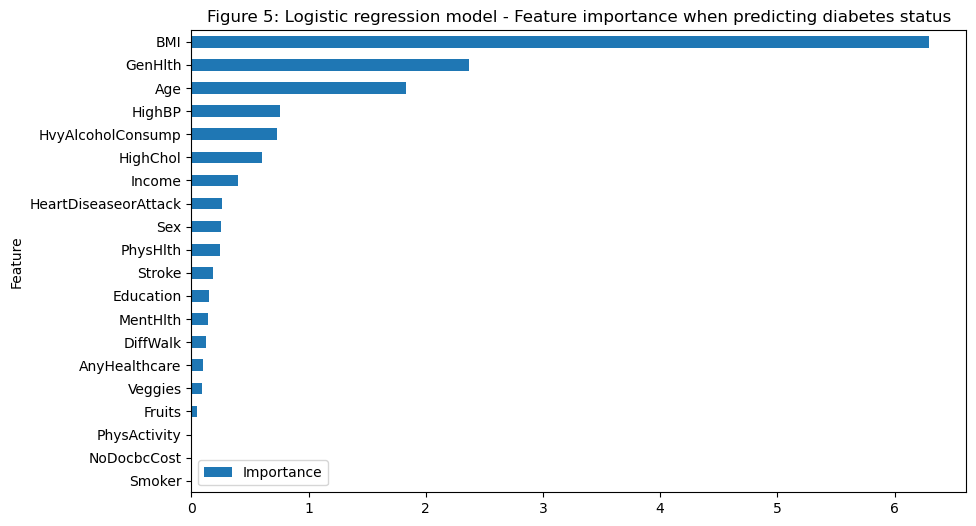

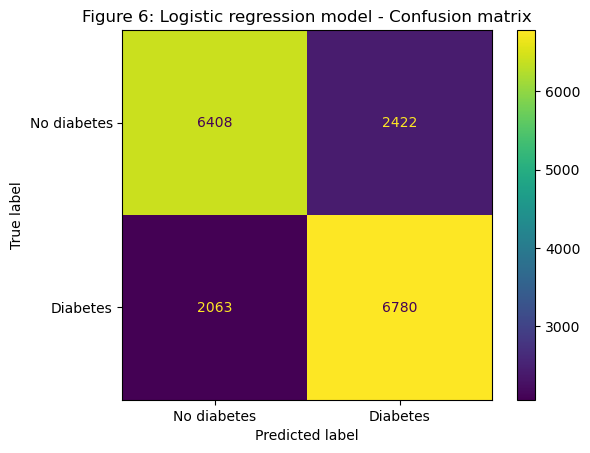

In [144]:
#START LOGISTIC REGRESSION ANALYSIS

#Create copy of dataframe for logistic regression analysis
logistic_df = final_df.copy(deep=True)

#Scale the NUMERICAL columns to enable analysis to be carried out
num_cols = ["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age", "Education", "Income"]

#Initialize and implement the scaler
scaler = MinMaxScaler()
logistic_df[num_cols] = scaler.fit_transform(logistic_df[num_cols])

#Initialise the logistic regression model
logistic_model = linear_model.LogisticRegression(solver="saga", max_iter=1000)

#Create the feature set and the target variable (ensuring target is binary)
X_logistic = logistic_df.drop("Diabetes_binary", axis=1)
y_logistic = logistic_df["Diabetes_binary"].astype("bool")

# Split the dataset into training and test sets
X_logistic_train, X_logistic_test, y_logistic_train, y_logistic_test = model_selection.train_test_split(X_logistic, y_logistic, test_size=0.25, random_state=42)

# Train the model and output prediction of test data
logistic_model.fit(X_logistic_train, y_logistic_train)
y_pred_logistic = logistic_model.predict(X_logistic_test)

# Evaluate the model and print relevant scores/results
accuracy_logistic = accuracy_score(y_logistic_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_logistic_test, y_pred_logistic)
class_report_logistic = classification_report(y_logistic_test, y_pred_logistic)
print("\nLogistic Regression (single) prediction results:", "\n")
print(f"Accuracy: {round(accuracy_logistic*100,2)} %", "\n")
print("Confusion Matrix:")
print(conf_matrix_logistic, "\n")
#print("Classification Report:")
#print(class_report_logistic)

#Extract the relevant fitted model coefficients
coeffs_logistic = logistic_model.coef_[0]

#Extract feature importance info and plot
feature_importance = pd.DataFrame({"Feature": X_logistic.columns, "Importance": np.abs(coeffs_logistic)})
feature_importance = feature_importance.sort_values("Importance", ascending=True)
feature_importance.plot(x="Feature", y="Importance", kind='barh', figsize=(10, 6))
plt.title("Figure 5: Logistic regression model - Feature importance when predicting diabetes status")

#Extract confusion matrix info and plot
confmat = metrics.confusion_matrix(y_logistic_test, y_pred_logistic)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confmat, display_labels = ["No diabetes", "Diabetes"])
cm_display.plot()
plt.title("Figure 6: Logistic regression model - Confusion matrix")



Text(0.5, 1.0, 'Figure 1: Heatmap of all variables; target variable is Diabetes_binary')

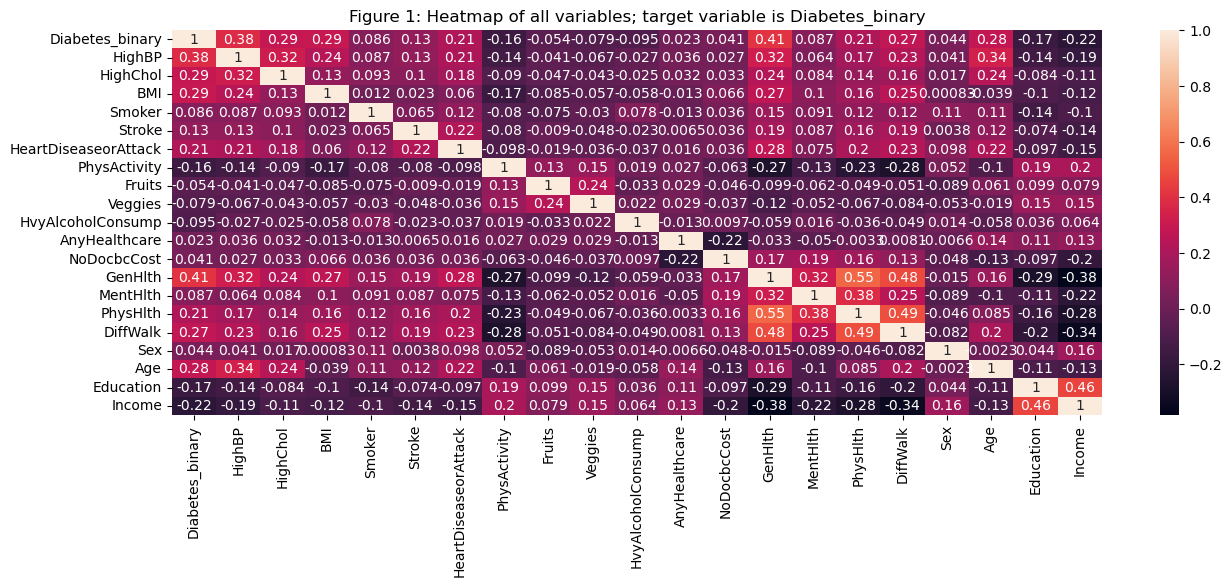

In [145]:
#Carry out some EDA

#Produce a heatmap showing correlations between all variables
plt.figure(figsize = (15,5))
sns.heatmap(final_df.corr(), annot = True)
plt.title("Figure 1: Heatmap of all variables; target variable is Diabetes_binary")

Text(0.5, 1.0, 'Figure 2: Comparison of General Health Rating for diabetic and non-diabetic respondents')

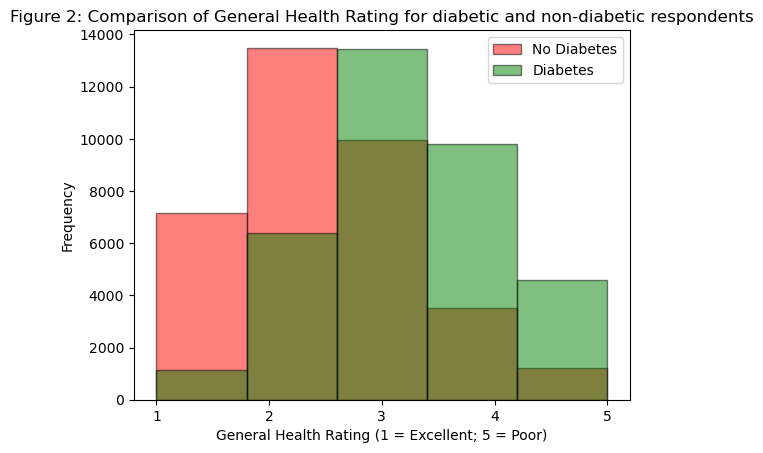

In [146]:
#Create histogram to compare distributions of general health (GenHlth) between individuals with and without diabetes

#Start by filtering the dataset by diabetes status
gen_health_nodiabetes = final_df[final_df["Diabetes_binary"] == False]["GenHlth"]
gen_health_diabetes = final_df[final_df["Diabetes_binary"] == True]["GenHlth"]

#Plot the histograms and add legend, titles and labels
plt.hist(gen_health_nodiabetes, bins=5, alpha=0.5, label="No Diabetes", color = "red", edgecolor="black")
plt.hist(gen_health_diabetes, bins=5, alpha=0.5, label="Diabetes", color = "green", edgecolor="black")
plt.legend()
plt.xlabel("General Health Rating (1 = Excellent; 5 = Poor)")
plt.ylabel("Frequency")

#Set x-axis to display sensible scale (i.e. integers 1 to 5, as recorded by GenHlth)
plt.xticks(range(1, 6))
plt.title("Figure 2: Comparison of General Health Rating for diabetic and non-diabetic respondents")


Text(0.5, 1.0, 'Figure 3: Comparison of BMI for diabetic and non-diabetic respondents')

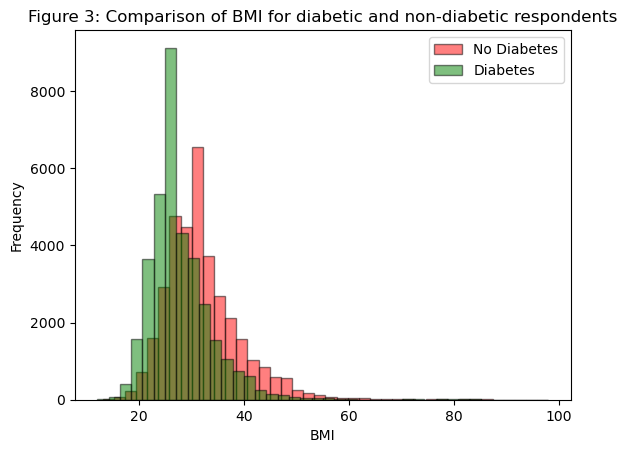

In [147]:
#Create histogram to compare distributions of BMI (BMI) between individuals with and without diabetes

#Filter the dataset by diabetes status
BMI_nodiabetes = final_df[final_df["Diabetes_binary"] == False]["BMI"]
BMI_diabetes = final_df[final_df["Diabetes_binary"] == True]["BMI"]

#Plot the histograms and add legend, titles and labels

plt.hist(BMI_diabetes, alpha=0.5, label="No Diabetes", bins=40, color = 'r', edgecolor="black")
plt.hist(BMI_nodiabetes, alpha=0.5, label="Diabetes", bins=40, color = 'g', edgecolor="black")
plt.legend()
plt.xlabel("BMI")
plt.ylabel("Frequency")

plt.title("Figure 3: Comparison of BMI for diabetic and non-diabetic respondents")

Text(0.5, 1.0, 'Figure 4: Diabetes status by Age')

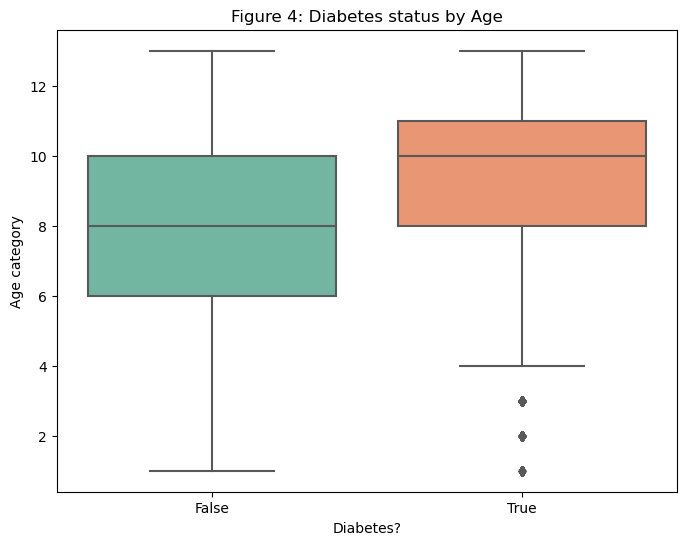

In [148]:
#Create boxplot to compare diabetes status by age
plt.figure(figsize = (8,6))
sns.boxplot(data = final_df, x = "Diabetes_binary", y = "Age", palette = "Set2")
plt.xlabel("Diabetes?")
plt.ylabel("Age category")
plt.title("Figure 4: Diabetes status by Age")



Random Forest prediction results: 

Accuracy: 75.04 % 

Confusion Matrix:
[[6224 2606]
 [1806 7037]] 

Best hyperparameters: {'max_depth': 10, 'n_estimators': 172}


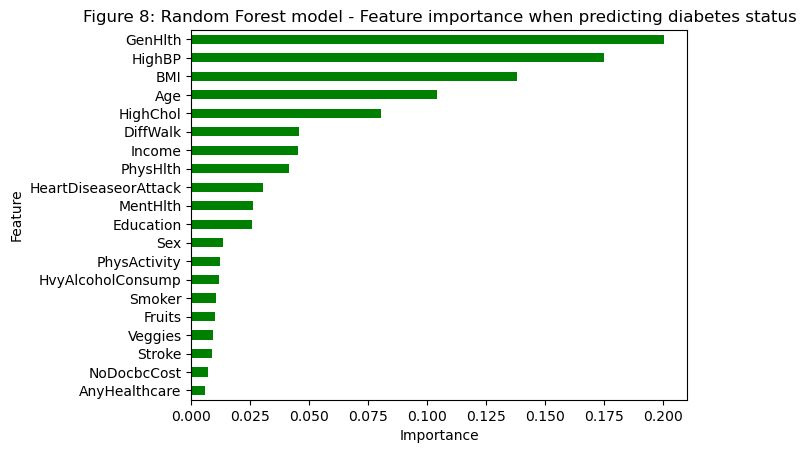

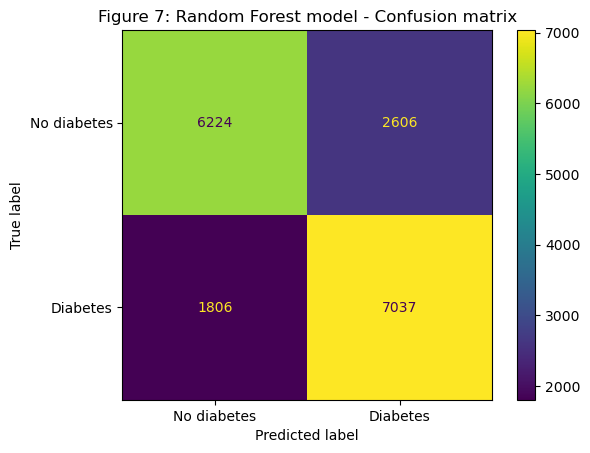

In [149]:
#START RANDOM FOREST ANALYSIS

#Create copy of dataframe for RF analysis
randomforest_df = final_df.copy(deep=True)

#Define the feature set and the target variable (ensuring target is binary)
X_randomforest = randomforest_df.drop("Diabetes_binary", axis=1)
y_randomforest = randomforest_df["Diabetes_binary"].astype("bool")

#Split the dataset into training and test sets
X_randomforest_train, X_randomforest_test, y_randomforest_train, y_randomforest_test = model_selection.train_test_split(X_randomforest, y_randomforest, test_size=0.25, random_state=42)

#Create a RF classifier
randomforest_model = RandomForestClassifier(n_estimators=385, max_depth = 12, random_state=42)

#Fit RF to the training set
randomforest_model.fit(X_randomforest_train, y_randomforest_train)

#Predict on test data
y_pred_randomforest = randomforest_model.predict(X_randomforest_test)

# Evaluate the model and print relevant info
accuracy_randomforest = accuracy_score(y_randomforest_test, y_pred_randomforest)
conf_matrix_randomforest = confusion_matrix(y_randomforest_test, y_pred_randomforest)
class_report_randomforest = classification_report(y_randomforest_test, y_pred_randomforest)
print("\nRandom Forest prediction results:", "\n")
print(f"Accuracy: {round(accuracy_randomforest*100,2)} %", "\n")
print("Confusion Matrix:")
print(conf_matrix_randomforest, "\n")

#Extract feature importance info and plot
global_importancesrf = pd.Series(randomforest_model.feature_importances_, index=X_randomforest_train.columns)
global_importancesrf.sort_values(ascending=True, inplace=True)
global_importancesrf.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Figure 8: Random Forest model - Feature importance when predicting diabetes status")

#Extract confusion matrix info and plot
confmat = metrics.confusion_matrix(y_randomforest_test, y_pred_randomforest)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confmat, display_labels = ["No diabetes", "Diabetes"])
cm_display.plot()
plt.title("Figure 7: Random Forest model - Confusion matrix")

#Carry out hyperparameter tuning (and then go back and use optimal parameters in model above)
param_dist = {'n_estimators': randint(50,500),'max_depth': randint(1,20)}

#Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(randomforest_model,param_distributions = param_dist, n_iter=5, cv=5)

#Fit the random search object to the data
rand_search.fit(X_randomforest_train, y_randomforest_train)

#Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)
